<h1 style="color:#2192f1" align="center"> LOGISTIC REGRESSION</h1>


<h2 align="center" style="color:#f0e912">IMPORT LIBRARIES</h2>


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from LogisticRegression.src.classification import gradient_descent, metrics
from LogisticRegression.src.visualization import confusion_matrix

<h2 align="center" style="color:#f0e912">DATA EXPLORATION</h2>


In [4]:
df = pd.read_csv("data/raisin_binary_classification/Raisin_Dataset.csv")

In [5]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [6]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


<h2 align="center" style="color:#f0e912">DATA PREPROCESSING</h2>


In [7]:
for c in df.select_dtypes(exclude=['object']):
    max = df[c].max()
    min = df[c].min()
    df[c] = df[c].apply(lambda x: (x - min) / (max - min))

In [8]:
for index, value in enumerate(df['Class'].unique()):
    df.loc[df['Class'] == value, ["Class"]] = index

In [9]:
df_train = df.sample(random_state=1, frac=0.8)
df_test = df.drop(df_train.index)

<h3 align="center" style="color:#5F75BF">CLASS BALANCE CHECK</h3>


In [10]:
print((df_train["Class"] == 0).sum())
print((df_train["Class"] == 1).sum())

369
351


<h3 align="center" style="color:#5F75BF">ADD INTERCEPT TERM</h3>


In [11]:
# Transform features and target into numpy
X = df_train.drop("Class", axis=1)
y = df_train["Class"].values.reshape(-1, 1)
# Intercept feature
i_term = np.ones((len(X), 1))
# Add intercept feature in other features
X_intercept = np.concatenate((i_term, X), axis=1)

In [12]:
# Transform features and target into numpy
X_test = df_test.drop("Class", axis=1)
y_test = df_test["Class"].values.reshape(-1, 1)
# Intercept feature
i_term_test = np.ones((len(X_test), 1))
# Add intercept feature in other features
X_test_intercept = np.concatenate((i_term_test, X_test), axis=1)

<h2 align="center" style="color:#f0e912">TRAINING</h2>


In [13]:
theta, final_loss, weights_history, loss_history, metrics = gradient_descent(X_intercept, y, type="SGD", alpha=0.0005)

In [14]:
metrics

{'accuracy': np.float64(0.5347222222222222),
 'precision': np.float64(0.5116959064327485),
 'recall': np.float64(0.9971509971509972),
 'f1_score': np.float64(0.6763285024154589)}

<h2 align="center" style="color:#f0e912">TESTING</h2>


In [15]:
from LogisticRegression.src.classification import metrics
metrics(X_test_intercept, y_test, theta)

{'accuracy': np.float64(0.6055555555555555),
 'precision': np.float64(0.5823529411764706),
 'recall': np.float64(1.0),
 'f1_score': np.float64(0.7360594795539033)}

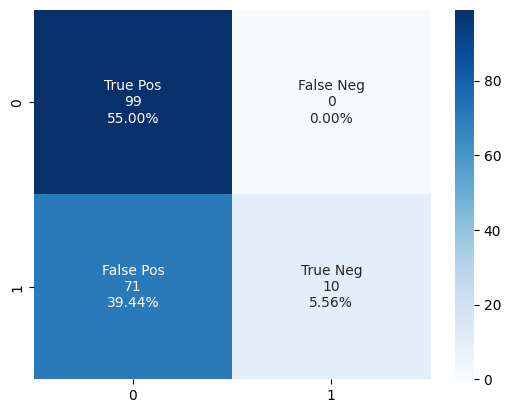

In [16]:
confusion_matrix(X_test_intercept,y_test, theta)